In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
from datetime import timedelta
import seaborn as sns

In [4]:
from sklearn.preprocessing import StandardScaler,LabelEncoder,minmax_scale
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,cross_val_predict,cross_val_score

from sklearn.metrics import r2_score,mean_squared_error



In [5]:
df = pd.read_pickle('pickled_parquet_2.pkl')

In [6]:
df.columns


Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'total_sec', 'duration', 'PUmonth', 'DOmonth', 'PUday',
       'DOday', 'PUhour', 'DOhour', 'PUtime', 'DOtime', 'PUdayno'],
      dtype='object')

In [6]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount',
       'total_amount', 'total_sec', 'duration', 'PUmonth', 'DOmonth', 'PUday',
       'DOday', 'PUhour', 'DOhour', 'PUtime', 'DOtime', 'PUZone', 'DOZone'],
      dtype='object')

In [49]:
dftrain = df[['RatecodeID','passenger_count','PULocationID','DOLocationID','trip_distance','total_sec','PUhour','PUdayno']]

In [50]:
dftest = df['total_amount']

In [51]:
x_train,x_test,y_train,y_test = train_test_split(dftrain,dftest,test_size=0.3)

In [52]:
#LINEAR REGRESSION

lregr = LinearRegression()
lregr.fit(x_train,y_train)
LR_y_test_pred = lregr.predict(x_test)

In [53]:
# ERROR METRICS

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,LR_y_test_pred))
print("RMSE: %f" % (rmse))

# The Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,LR_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,LR_y_test_pred))

accuracy = r2_score(y_test,LR_y_test_pred)
print ("Cross-Predicted Accuracy:", accuracy)

RMSE: 1.101369
Mean squared error: 1.21
Variance score: 0.89
Cross-Predicted Accuracy: 0.8894043643215156


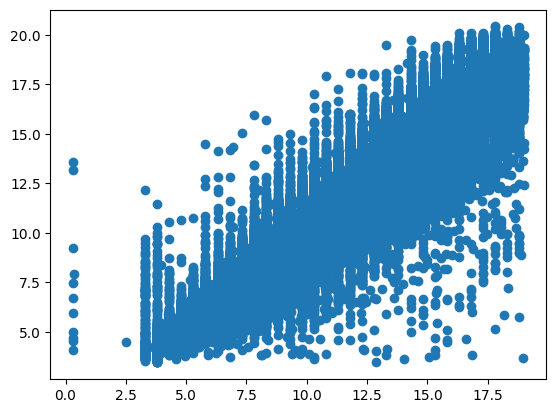

In [44]:
plt.scatter(y_test,LR_y_test_pred)

In [13]:
res_LR = LR_y_test_pred-y_test
res_LR.describe()

count    454288.000000
mean         -0.000311
std           1.449326
min         -14.369927
25%          -0.852021
50%           0.082090
75%           0.970571
max          13.864045
Name: total_amount, dtype: float64

In [33]:
res_LR = res_LR[res_LR>-10]
res_LR = res_LR[res_LR<10]

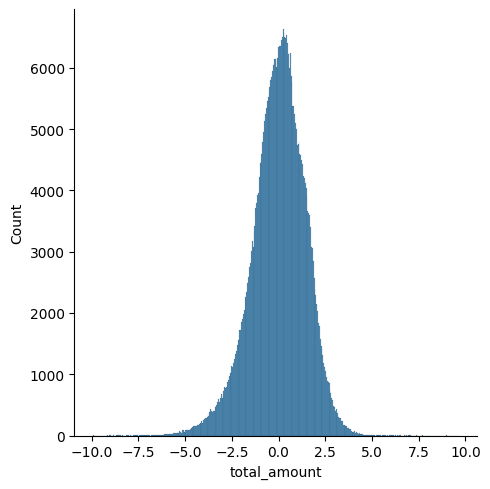

In [34]:
sns.displot(res_LR)

Cross val score :  [0.69663412 0.73255085 0.75915191 0.76062678 0.71803548 0.7003057 ]
Cross-Predicted Accuracy: 0.7288830609618973


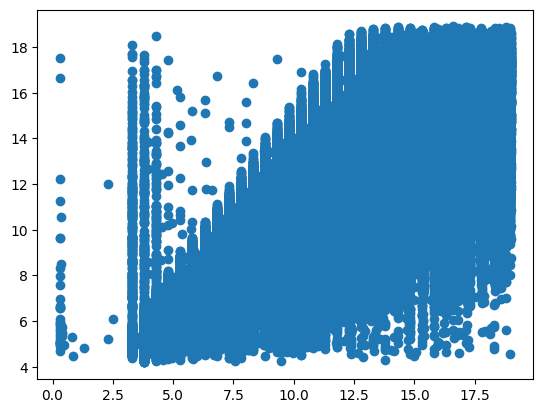

In [39]:
score = cross_val_score(lregr, dftrain, dftest,cv=6)
print('Cross val score : ',score)

    
predictions = cross_val_predict(lregr, dftrain, dftest, cv=6)
plt.scatter(dftest, predictions)

accuracy = r2_score(dftest,predictions)
print ("Cross-Predicted Accuracy:", accuracy)

In [40]:
(predictions-dftest).describe()

count    1.514293e+06
mean     1.763178e-02
std      1.723364e+00
min     -1.440136e+01
25%     -9.196489e-01
50%      2.079112e-01
75%      1.173396e+00
max      1.719630e+01
Name: total_amount, dtype: float64

## Decision Tree Regression


RMSE: 1.468522
Mean squared error: 2.16
Variance score: 0.80


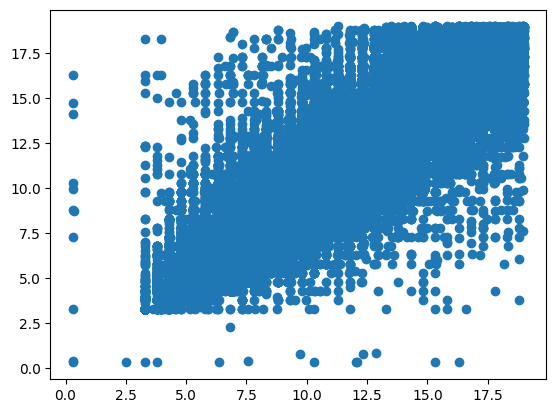

In [45]:
# TRAINING USING DECISION TREE REGRESSOR MODEL

dtr = DecisionTreeRegressor().fit(x_train,y_train)
DTR_y_test_pred = dtr.predict(x_test)

# Error Metrics

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,DTR_y_test_pred))
print("RMSE: %f" % (rmse))

# Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,DTR_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,DTR_y_test_pred))
plt.scatter(y_test,DTR_y_test_pred)

In [17]:
res_DTR = y_test-DTR_y_test_pred
res_DTR.describe()

count    454288.000000
mean          0.001386
std           1.732349
min         -15.660000
25%          -1.030000
50%           0.000000
75%           1.050000
max          15.660000
Name: total_amount, dtype: float64

In [18]:
res_DTR = res_DTR[res_DTR>=-10]
res_DTR = res_DTR[res_DTR<=10]

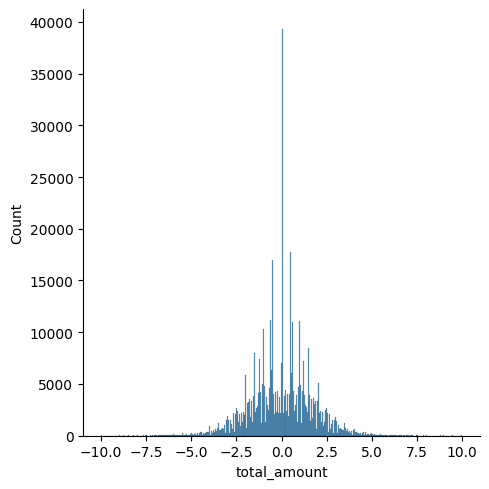

In [19]:
sns.displot(res_DTR)

## Random Forest Regression

In [46]:
# TRAINING USING DECISION TREE REGRESSOR MODEL

RF = RandomForestRegressor(n_estimators=12,max_depth=8)
RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=8, n_estimators=12)

In [47]:
RF_y_test_pred = RF.predict(x_test)

RMSE: 1.058665
Mean squared error: 1.12
Variance score: 0.90


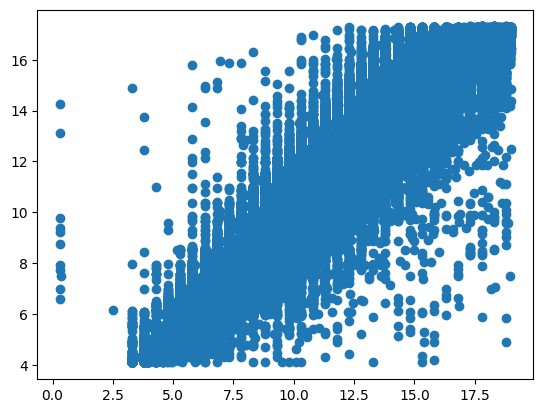

In [48]:
# Error Metrics

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,RF_y_test_pred))
print("RMSE: %f" % (rmse))

# Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,RF_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,RF_y_test_pred))
plt.scatter(y_test,RF_y_test_pred)

In [23]:
res_RF = y_test - RF_y_test_pred

In [24]:
res_RF.describe()

count    454288.000000
mean         -0.000748
std           1.311028
min         -12.743384
25%          -0.891385
50%           0.007123
75%           0.775458
max          14.614920
Name: total_amount, dtype: float64

In [25]:
res_RF = res_RF[res_RF>=-10]
res_RF = res_RF[res_RF<=10]

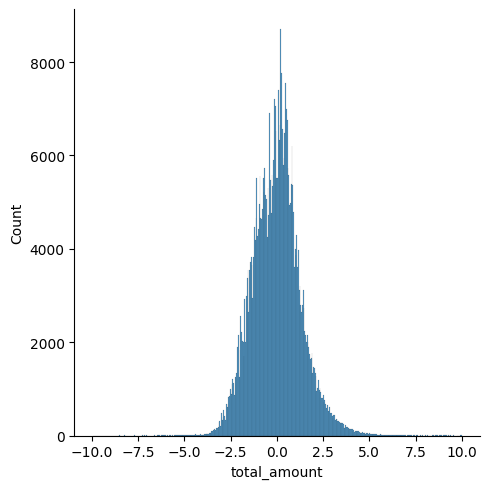

In [26]:
sns.displot(res_RF)

In [27]:
import pickle

In [28]:
pickle_out = open('taxi_RF.pkl',mode='wb')

In [29]:
pickle.dump(RF,pickle_out)

In [30]:
pickle_out.close()

RandomForestRegressor(max_depth=8, n_estimators=12)

In [31]:
!pip freeze | grep scikit-learn


scikit-learn==1.2.0


In [4]:
RF = pd.read_pickle('taxi_RF.pkl')

In [5]:
RF

RandomForestRegressor(max_depth=8, n_estimators=12)

# LR with scaling

In [ ]:
# Initialize the StandardScaler
scaler = min

# Fit the scaler on the training data and transform both the training and testing data
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [59]:
lregr.fit(x_train_scaled,y_train)
LR_y_test_pred = lregr.predict(x_test_scaled)

In [60]:
# ERROR METRICS

# Root Mean Square Error
rmse = np.sqrt(mean_squared_error(y_test,LR_y_test_pred))
print("RMSE: %f" % (rmse))

# The Mean Squared Error
print("Mean squared error: %.2f"
      % mean_squared_error(y_test,LR_y_test_pred))

# R2 Score
print('Variance score: %.2f' % r2_score(y_test,LR_y_test_pred))

accuracy = r2_score(y_test,LR_y_test_pred)
print ("Cross-Predicted Accuracy:", accuracy)

RMSE: 1.101369
Mean squared error: 1.21
Variance score: 0.89
Cross-Predicted Accuracy: 0.8894043643215156
